### The purpose of this workbook is to imitate the analysis of the data which is similar to the to any "Inventory/product" based company. This workbook will help us to approach the dataset and also set the foundation the further analytical approach

### This workbook is built on python 3.6

### Loading the important Libraries

In [37]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore')
import matplotlib as mpl


pd.set_option('display.float_format', lambda x: '%.3f' % x ) # This will control the decimal to three digits

from subprocess import check_output
%matplotlib inline

### Loading the data into Python

#### This particular dataset has following files 

#### 1.order_product_train and order_product_prior -> This Dataset is the transactional level data or training Dataset 

#### 2.orders -> Gives the hour of the transaction as well as the day of the week along with days since last order

#### 3.products -> product details

#### 4.aisles -> aisle details 

#### 5.department  -> department details 

In [2]:
order_product_train= pd.read_csv("F:\Inventory Analysis\Inventory case studies\Instacart\data\order_products__train.csv")
order_product_prior= pd.read_csv("F:\Inventory Analysis\Inventory case studies\Instacart\data\order_products__prior.csv")

orders = pd.read_csv("F:\Inventory Analysis\Inventory case studies\Instacart\data\orders.csv")
products= pd.read_csv("F:\Inventory Analysis\Inventory case studies\Instacart\data\products.csv")

aisles = pd.read_csv(r"F:\Inventory Analysis\Inventory case studies\Instacart\data\aisles.csv")
department= pd.read_csv("F:\Inventory Analysis\Inventory case studies\Instacart\data\departments.csv")

In [3]:
#Checking the head of the datasets 
order_product_train.head()

,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1


### Exploring the order_product_train or order_product_prior datasets since in description they have specially mentioned  the these dataset contains the previous purchase records 


In [4]:
print('The Dataset order_product_train has {} rows and {} columns'.format(order_product_train.shape[0], order_product_train.shape[1]))
print('The Dataset order_product_prior has {} rows and {} columns'.format(order_product_prior.shape[0], order_product_prior.shape[1]))

The Dataset order_product_train has 1384617 rows and 4 columns
The Dataset order_product_prior has 32434489 rows and 4 columns


Checking the head of the order_product_train

### Since the order_product_prior and order_product_train has same columns we will concat them together and perform analysis on the this dataset

In [5]:
order_products= pd.concat([order_product_prior,order_product_train], axis=0)

###  Checking for the missing data  

In [6]:
total_missng=order_products.isnull().sum().sort_values(ascending=False)
percentage_missing= order_products.isnull().sum()/len(order_products)*100
total_missng
percentage_missing

order_id            0.000
product_id          0.000
add_to_cart_order   0.000
reordered           0.000
dtype: float64

### We do not have any missing values in order_product Dataset 

### Checking the unique types of the orders and products 

In [7]:

orders_unique= len(set(order_products.order_id))
print("There are {} unique order in orders_product dataset".format(orders_unique))
products_unique= len(set(order_products.product_id))
print("There are {} unique products in orders_product dataset".format(products_unique))

There are 3346083 unique order in orders_product dataset
There are 49685 unique products in orders_product dataset


### Finding out orders which has highest unit sale 

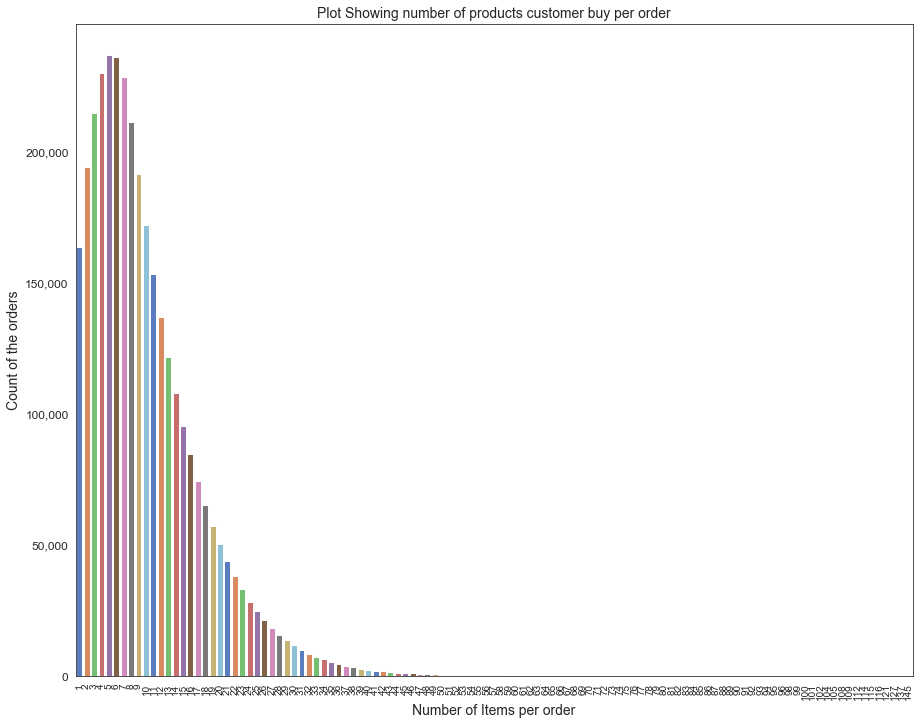

In [39]:
group=order_products.groupby('order_id')['add_to_cart_order'].agg('max').reset_index()
group= group.add_to_cart_order.value_counts()
sns.set_style('white')
fig, axes= plt.subplots(figsize=(15,12))
plt.xticks(rotation='vertical',fontsize=10)
plt.yticks(fontsize=12)
sns.barplot(group.index, group.values, palette="muted")
axes.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
plt.xlabel("Number of Items per order",fontsize=14)
plt.ylabel("Count of the orders", fontsize=14)
plt.title("Plot Showing number of products customer buy per order", fontsize=14)
plt.show()

### It shows that most of the time customer orders 4 to 7 items per order

### Finding out which product moves fast 

In [9]:
group_pt= order_products.groupby('product_id')['reordered'].agg({'transaction_counts': 'count'}).reset_index()
group_pt= pd.merge(group_pt,products[['product_id','product_name']], on='product_id', how='left' )
group_pt.sort_values('transaction_counts', ascending=False, inplace=True)

 ### Plotting the fast moving products 

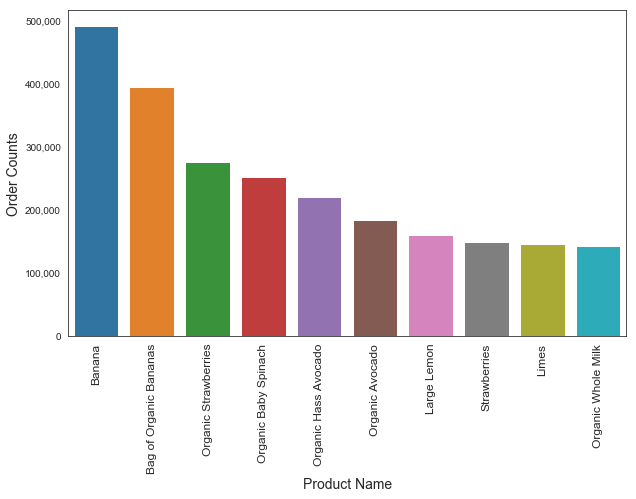

In [43]:
fig,axes= plt.subplots(figsize=(10,6))
plt.xticks(rotation='vertical', fontsize=12)
sns.barplot(group_pt['product_name'][0:10], group_pt['transaction_counts'][0:10])
axes.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
plt.xlabel("Product Name", fontsize=14)
plt.ylabel("Order Counts", fontsize=14)
plt.show()

### Finding out the reordering Frequency

In [11]:
group_ro = order_products.groupby('reordered')['product_id'].agg({'total_reordered':'count'}).reset_index()

### Finding out the ratio for each re ordered item 

In [44]:
group_ro['ratio %']= group_ro['total_reordered'].apply(lambda x:  x/sum(group_ro['total_reordered'])*100)
group_ro

,reordered,total_reordered,ratio %
0,0,13863746,40.994
1,1,19955360,59.006


### It shows that 59% of the orders were reordering orders

### Plotting 

Text(0.5, 0, '')

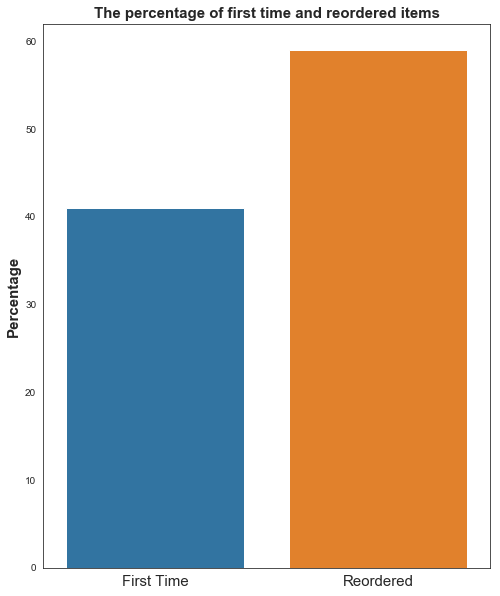

In [45]:
fig,axes= plt.subplots(figsize=(8,10))
g=sns.barplot(group_ro['reordered'], group_ro['ratio %'])
g.set_xticklabels({"First Time":0,"Reordered":1}, fontsize=15)
plt.title("The percentage of first time and reordered items" , fontweight='bold', fontsize=15)
plt.ylabel("Percentage", fontsize=15, fontweight='bold')
plt.xlabel('')

###  Most Reordered item

In [46]:
group_topro = order_products.groupby('product_id')['reordered']. agg({'reordered_count': 'count', 'reordered_sum': 'sum'}).reset_index()
group_topro['prob'] = group_topro['reordered_sum']/group_topro['reordered_count']
group_topro = pd.merge(group_topro,products[['product_id','product_name']], on='product_id', how='left' )
group_topro = group_topro[group_topro['prob']> 0.75].sort_values('prob', ascending=False)

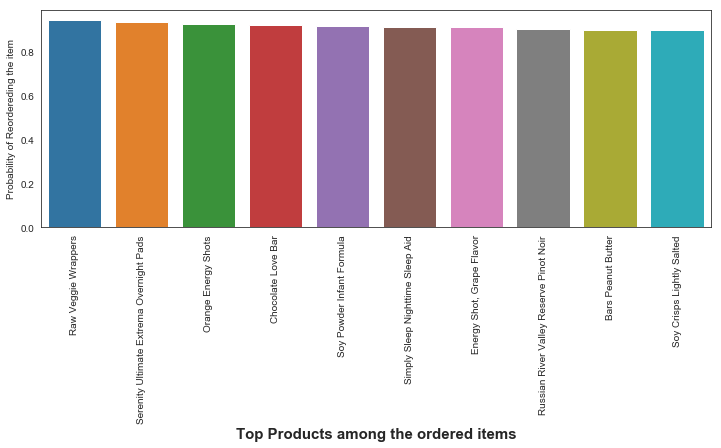

In [48]:
fig, axes= plt.subplots(figsize=(12,4))
plt.xticks(rotation='vertical')
sns.barplot(group_topro.product_name[0:10], group_topro.prob[0:10])
plt.xlabel("Top Products among the ordered items",fontweight='bold',fontsize=15)
plt.ylabel("Probability of Reordereding the item")
plt.show()

### We see that mostly customers reorder the eatables 

### Analysing the order Dataset

In [16]:
#Checking the missing values 
missn_orders=orders.isnull().sum()
percentage_missin= orders.isnull().sum()/len(orders)*100

In [17]:
missn_orders

order_id                       0
user_id                        0
eval_set                       0
order_number                   0
order_dow                      0
order_hour_of_day              0
days_since_prior_order    206209
dtype: int64

In [18]:
percentage_missin

order_id                 0.000
user_id                  0.000
eval_set                 0.000
order_number             0.000
order_dow                0.000
order_hour_of_day        0.000
days_since_prior_order   6.028
dtype: float64

### days_since_prior_order  has  206209  which is 6.2 percent of the total data 

Text(0, 0.5, 'Count of the Transaction')

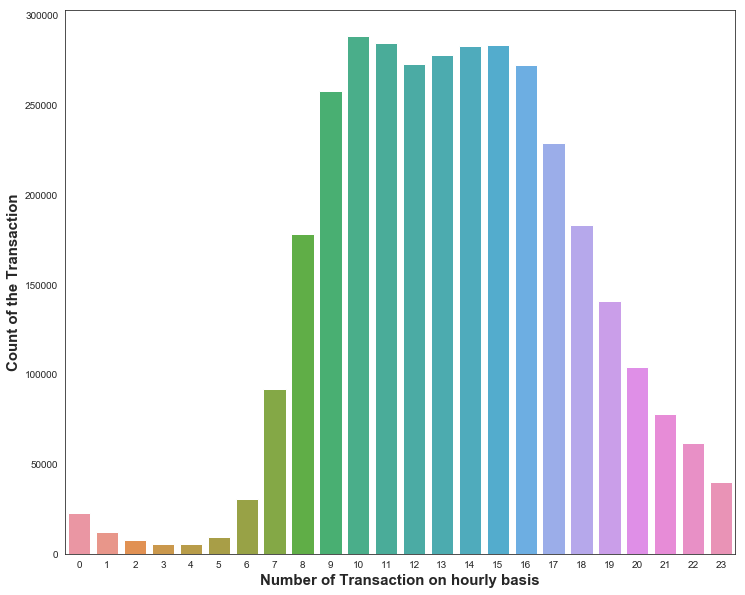

In [50]:
group_dwo = orders.groupby('order_hour_of_day')['order_id'].agg({'tran_per_hours':'count'}).reset_index()

fig, axes= plt.subplots(figsize=(12,10))
sns.barplot(group_dwo.order_hour_of_day, group_dwo.tran_per_hours)
plt.xlabel("Number of Transaction on hourly basis", fontsize=15, fontweight='bold')
plt.ylabel("Count of the Transaction", fontsize=15, fontweight='bold')


### The bulk of the transaction happns between 7:00 am to 10:00 pm 

### The day of the week which has most transactions 

In [20]:
group_wod = orders.groupby('order_dow')['order_id'].agg({'tran_per_week':'count'}).reset_index()

### Day of the Week 

Text(0, 0.5, 'Count of the Transaction')

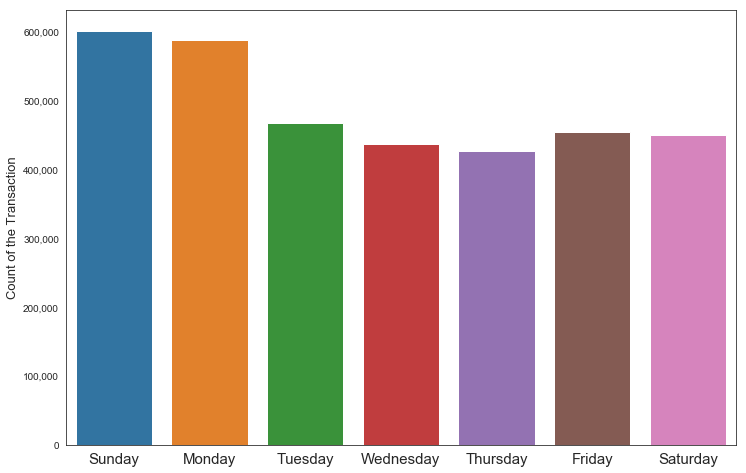

In [56]:
fig, axes=plt.subplots(figsize=(12,8))
p=sns.barplot(group_wod.order_dow, group_wod.tran_per_week)
p.set_xticklabels({"Sunday":0,"Monday":1,"Tuesday":2, "Wednesday":3,"Thursday":4,"Friday":5,"Saturday":6}, fontsize=15)
axes.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
plt.xlabel('')
plt.ylabel("Count of the Transaction", fontsize=13)

### Analysing the period of reorder of the items

In [22]:
grouped_reorder= orders.groupby('user_id')['days_since_prior_order'].agg({'avg_reorder': 'mean'}).reset_index()

grouped_reorder.sort_values('avg_reorder',ascending=False, inplace=True)

reorder=grouped_reorder['avg_reorder'].mean()

reorder

15.44868632016524

###  The average days for the reordering is 15 Days 

In [23]:
# Checking the unique users in the whole data set 

print("The Unique Customers in the orders Datasets is {}".format (len(set(orders.user_id))))

The Unique Customers in the orders Datasets is 206209


###  Let us analyse the product, department dataset and aisles dataset. Therefore we merge all these datasets 


In [24]:
items= pd.merge(left=pd.merge(products,right=department, how='left'),right= aisles, how='left')

In [25]:
grp_dpt= items.groupby('department')['product_id'].agg({'products_department': 'count'}).reset_index().sort_values('products_department', ascending=False)
grp_dpt['ratio']= grp_dpt['products_department'].apply( lambda x: x/sum(grp_dpt['products_department'])).sort_values(ascending=False)

In [26]:
grp_dpt.head(10)

,department,products_department,ratio
17,personal care,6563,0.132
20,snacks,6264,0.126
16,pantry,5371,0.108
3,beverages,4365,0.088
10,frozen,4007,0.081
7,dairy eggs,3449,0.069
11,household,3085,0.062
6,canned goods,2092,0.042
9,dry goods pasta,1858,0.037
19,produce,1684,0.034


Text(0, 0.5, '')

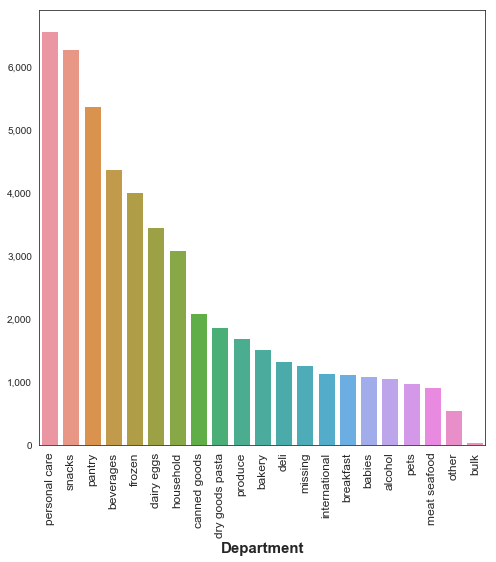

In [58]:
fig,axes= plt.subplots(figsize=(8,8))
plt.xticks(rotation='vertical', fontsize=12)
axes.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
sns.barplot(grp_dpt.department,grp_dpt.products_department)
plt.xlabel('Department', fontsize=15, fontweight='bold')
plt.ylabel('')


In [28]:
group_aisle= items.groupby(['department','aisle'])['product_id'].agg({'total_products': 'count'}).reset_index().sort_values('total_products',ascending=False)

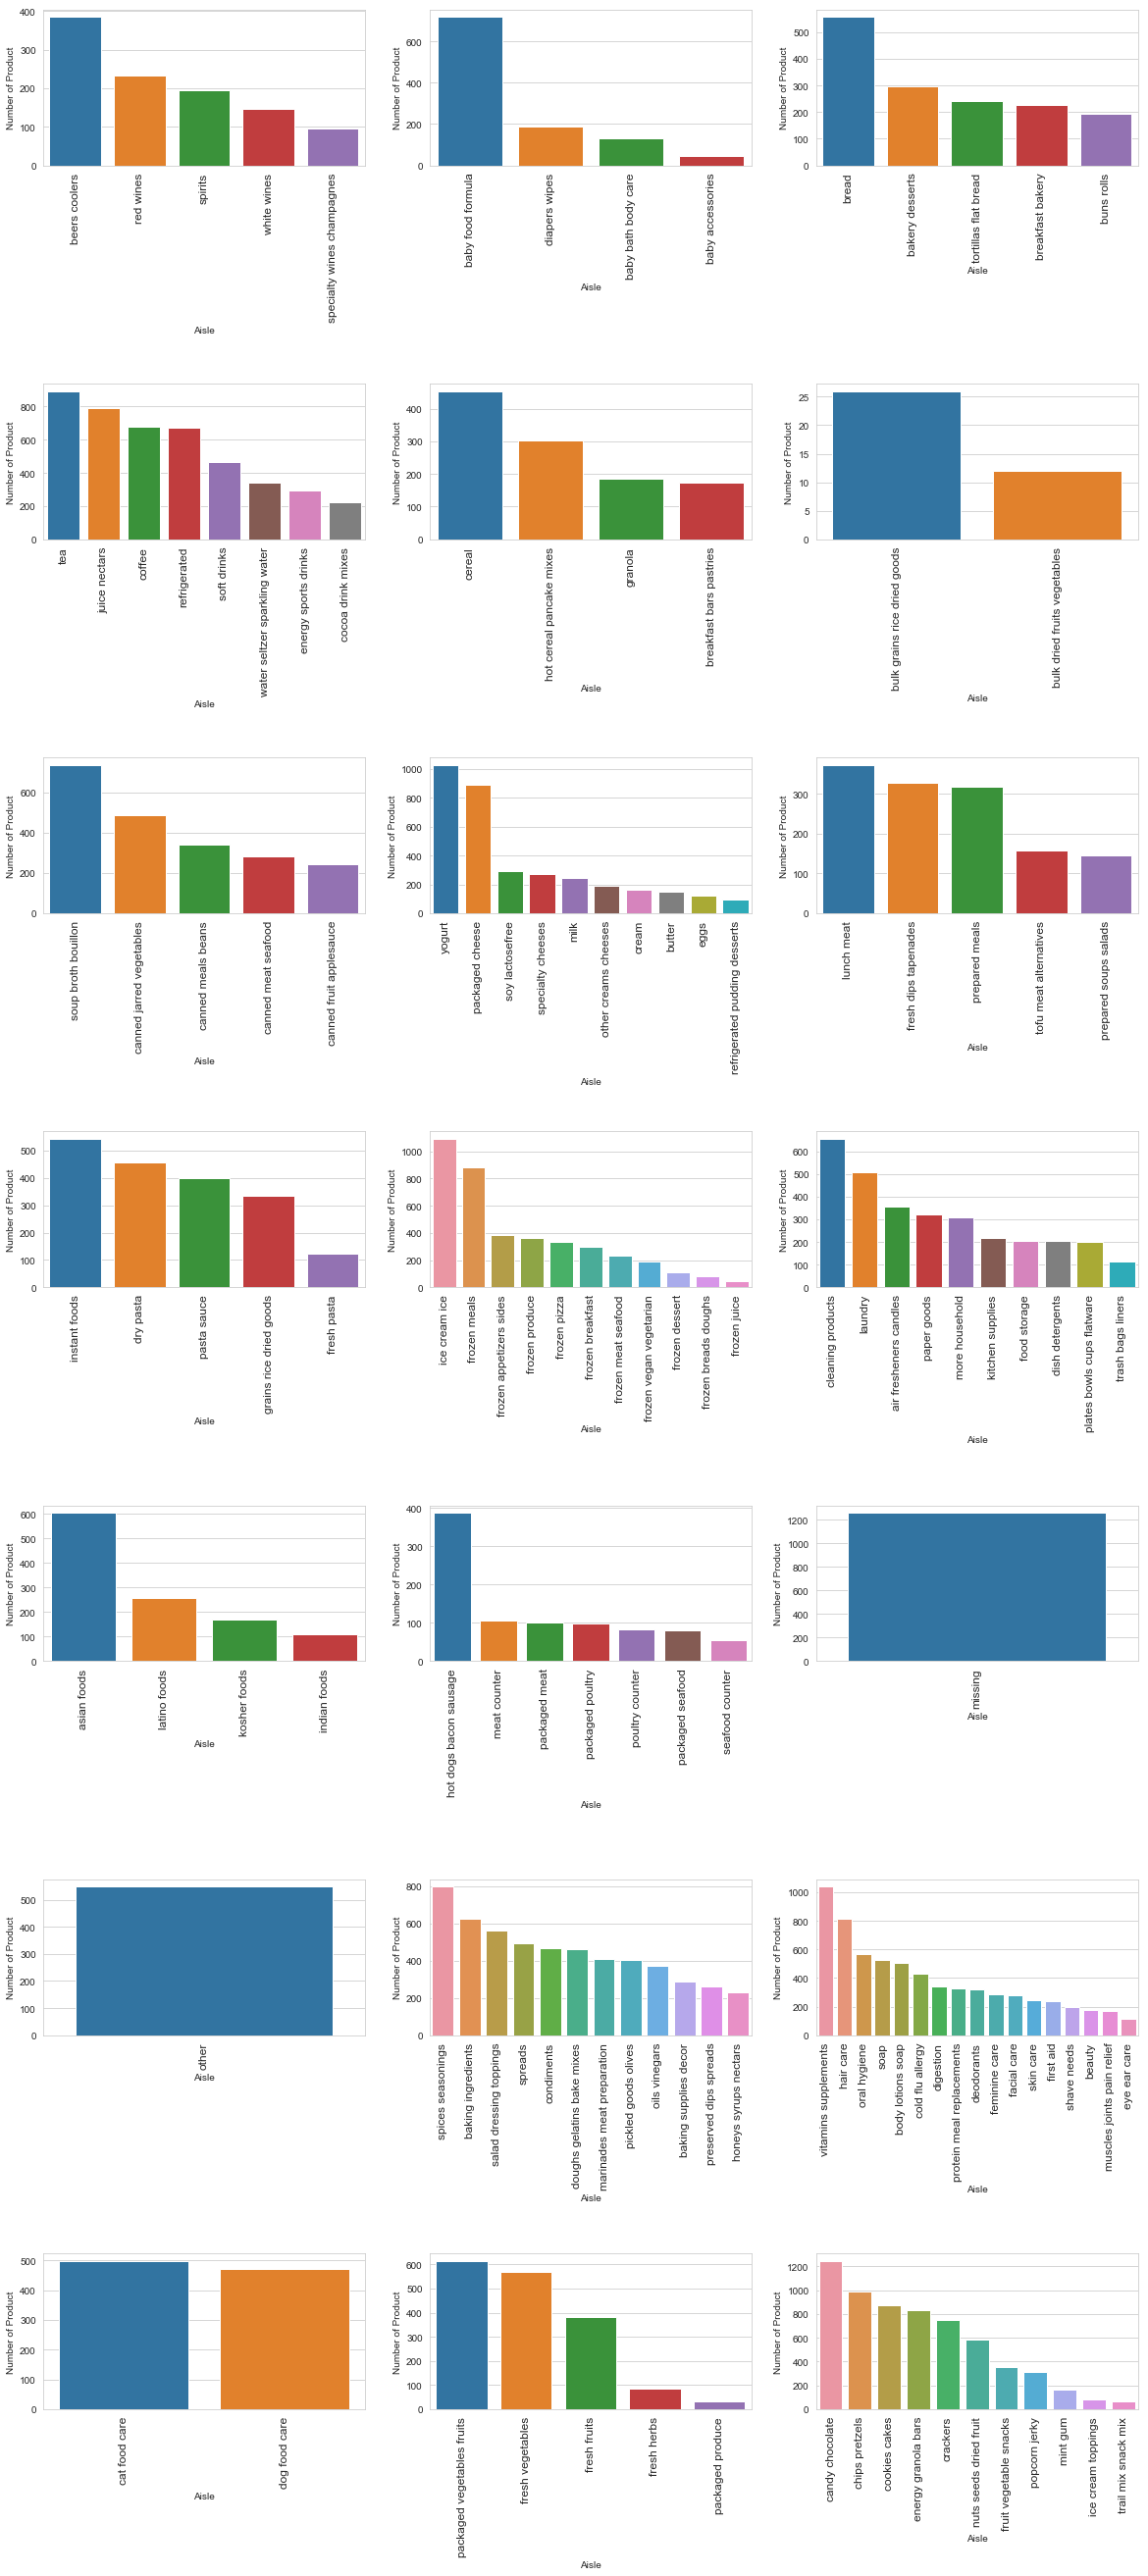

In [29]:
fig,axes= plt.subplots(7,3,figsize=(20,45), gridspec_kw = dict(hspace=1.4))
for (aisle, group), ax in zip(group_aisle.groupby(["department"]), axes.flatten()):
     g=sns.barplot(group.aisle, group.total_products, ax=ax)
     ax.set(xlabel='Aisle', ylabel= 'Number of Product')
     g.set_xticklabels(labels=group.aisle,rotation=90,fontsize=12)